In [1]:
import sys
import os
import numpy as np
import pandas as pd
from tools.tools import load,save,checkdir,lprint
from qcdlib.core import CORE
from qcdlib.aux import AUX
from qcdlib.interpolator import INTERPOLATOR
from tools.config import conf
from pdf0_SB import PDF
from ppdf0_SB import PPDF
import matplotlib.pyplot as plt

conf['aux'] = AUX()

In [2]:
pdf_files=[]
for i in range(1,49):
    if i < 10: pdf_files.append('CJ15lo_000'+'%s'%i)
    elif i >=10: pdf_files.append('CJ15lo_00'+'%s'%i)

ppdf_files=[]
for i in range(1,101):
    if i < 10: ppdf_files.append('NNPDFpol11_100_000'+'%s'%i)
    elif i >=10 and i < 100: ppdf_files.append('NNPDFpol11_100_00'+'%s'%i)
    elif i >=100: ppdf_files.append('NNPDFpol11_100_0'+'%s'%i)

## Generating data files for f1 and g1

In [3]:
xarr=np.linspace(0.01,0.99,20)
Q2arr=np.linspace(1.0,125,25)

for Q2 in Q2arr:
    pdfu_mean=[]
    pdfu_std=[]
    for x in xarr:
        pdfu=[]
        for f in pdf_files:
            conf['pdf']  = PDF('p','/CJ15lo/%s'%f)
            pdfu.append(conf['pdf'].get_C(x, Q2)[1])
        pdfu_mean.append(np.mean(pdfu))
        pdfu_std.append(np.std(pdfu))
        
    pdfu_mean = np.array(pdfu_mean)
    pdfu_std = np.array(pdfu_std)
    
    save([Q2,pdfu_mean,pdfu_std],'f1_data/pdfu_Q2_%d.dat'%np.int(Q2))

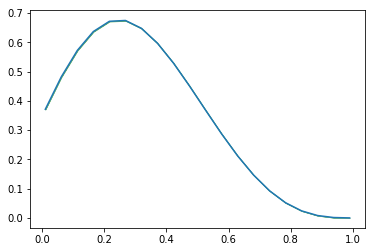

In [4]:
Q2=1
pdfu_mean=load('f1_data/pdfu_Q2_%d.dat'%Q2)[1]
pdfu_std=load('f1_data/pdfu_Q2_%d.dat'%Q2)[2]

plt.figure()
plt.plot(xarr,xarr*pdfu_mean)
plt.fill_between(xarr,xarr*(pdfu_mean+pdfu_std),xarr*(pdfu_mean-pdfu_std),color='green',alpha='0.5')
plt.show()

In [5]:
xarr=np.linspace(0.01,0.99,20)
Q2arr=np.linspace(1.0,125,25)

for Q2 in Q2arr:
    pdfd_mean=[]
    pdfd_std=[]
    for x in xarr:
        pdfd=[]
        for f in pdf_files:
            conf['pdf']  = PDF('p','/CJ15lo/%s'%f)
            pdfd.append(conf['pdf'].get_C(x, Q2)[3])
        pdfd_mean.append(np.mean(pdfd))
        pdfd_std.append(np.std(pdfd))
        
    pdfd_mean = np.array(pdfd_mean)
    pdfd_std = np.array(pdfd_std)
    
    save([Q2,pdfd_mean,pdfd_std],'f1_data/pdfd_Q2_%d.dat'%np.int(Q2))

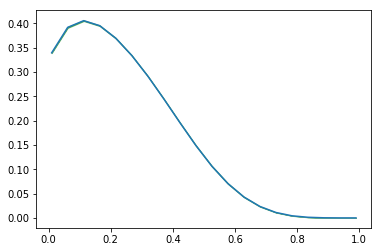

In [6]:
Q2=1
pdfd_mean=load('f1_data/pdfd_Q2_%d.dat'%Q2)[1]
pdfd_std=load('f1_data/pdfd_Q2_%d.dat'%Q2)[2]

plt.figure()
plt.plot(xarr,xarr*pdfd_mean)
plt.fill_between(xarr,xarr*(pdfd_mean+pdfd_std),xarr*(pdfd_mean-pdfd_std),color='green',alpha='0.5')
plt.show()

In [7]:
xarr=np.linspace(0.01,0.99,20)
Q2arr=np.linspace(1.0,125,25)

for Q2 in Q2arr:
    ppdfu_mean=[]
    ppdfu_std=[]
    for x in xarr:
        ppdfu=[]
        for f in ppdf_files:
            conf['ppdf']  = PDF('p','/NNPDFpol11_100/%s'%f)
            ppdfu.append(conf['ppdf'].get_C(x, Q2)[1])
        ppdfu_mean.append(np.mean(ppdfu))
        ppdfu_std.append(np.std(ppdfu))
        
    ppdfu_mean = np.array(ppdfu_mean)
    ppdfu_std = np.array(ppdfu_std)
    
    save([Q2,ppdfu_mean,ppdfu_std],'g1_data/ppdfu_Q2_%d.dat'%np.int(Q2))

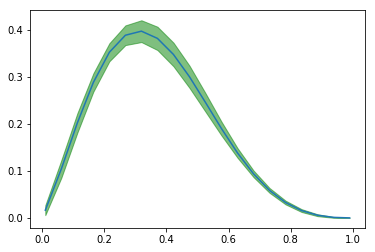

In [8]:
Q2=1
ppdfu_mean=load('g1_data/ppdfu_Q2_%d.dat'%Q2)[1]
ppdfu_std=load('g1_data/ppdfu_Q2_%d.dat'%Q2)[2]

plt.figure()
plt.plot(xarr,xarr*ppdfu_mean)
plt.fill_between(xarr,xarr*(ppdfu_mean+ppdfu_std),xarr*(ppdfu_mean-ppdfu_std),color='green',alpha=0.5)
plt.show()

In [9]:
xarr=np.linspace(0.01,0.99,20)
Q2arr=np.linspace(1.0,125,25)

for Q2 in Q2arr:
    ppdfd_mean=[]
    ppdfd_std=[]
    for x in xarr:
        ppdfd=[]
        for f in ppdf_files:
            conf['ppdf']  = PDF('p','/NNPDFpol11_100/%s'%f)
            ppdfd.append(conf['ppdf'].get_C(x, Q2)[3])
        ppdfd_mean.append(np.mean(ppdfd))
        ppdfd_std.append(np.std(ppdfd))
        
    ppdfd_mean = np.array(ppdfd_mean)
    ppdfd_std = np.array(ppdfd_std)
    
    save([Q2,ppdfd_mean,ppdfd_std],'g1_data/ppdfd_Q2_%d.dat'%np.int(Q2))

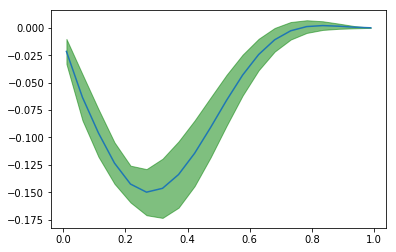

In [10]:
Q2=1
ppdfd_mean=load('g1_data/ppdfd_Q2_%d.dat'%Q2)[1]
ppdfd_std=load('g1_data/ppdfd_Q2_%d.dat'%Q2)[2]

plt.figure()
plt.plot(xarr,xarr*ppdfd_mean)
plt.fill_between(xarr,xarr*(ppdfd_mean+ppdfd_std),xarr*(ppdfd_mean-ppdfd_std),color='green',alpha=0.5)
plt.show()

## Generating data for Soffer Bound

In [3]:
xarr=np.linspace(0.01,0.99,20)
Q2arr=np.linspace(1.0,125,25)

for Q2 in Q2arr:
    pdfu_mean=load('f1_data/pdfu_Q2_%d.dat'%Q2)[1]
    pdfu_std=load('f1_data/pdfu_Q2_%d.dat'%Q2)[2]
    ppdfu_mean=load('g1_data/ppdfu_Q2_%d.dat'%Q2)[1]
    ppdfu_std=load('g1_data/ppdfu_Q2_%d.dat'%Q2)[2]
    
    SBu_mean = 0.5*(pdfu_mean + ppdfu_mean)
    SBu_std = 2.0*np.sqrt((0.5*pdfu_std)**2 + (0.5*ppdfu_std)**2)
    
    save([Q2,SBu_mean,SBu_std],'SB_data/SBu_Q2_%d.dat'%np.int(Q2))

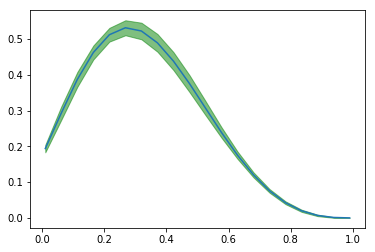

In [4]:
Q2=1
SBu_mean=load('SB_data/SBu_Q2_%d.dat'%Q2)[1]
SBu_std=load('SB_data/SBu_Q2_%d.dat'%Q2)[2]

plt.figure()
plt.plot(xarr,xarr*SBu_mean)
plt.fill_between(xarr,xarr*(SBu_mean+SBu_std),xarr*(SBu_mean-SBu_std),color='green',alpha=0.5)
plt.show()

In [5]:
xarr=np.linspace(0.01,0.99,20)
Q2arr=np.linspace(1.0,125,25)

for Q2 in Q2arr:
    pdfd_mean=load('f1_data/pdfd_Q2_%d.dat'%Q2)[1]
    pdfd_std=load('f1_data/pdfd_Q2_%d.dat'%Q2)[2]
    ppdfd_mean=load('g1_data/ppdfd_Q2_%d.dat'%Q2)[1]
    ppdfd_std=load('g1_data/ppdfd_Q2_%d.dat'%Q2)[2]
    
    SBd_mean = 0.5*(pdfd_mean + ppdfd_mean)
    SBd_std = 2.0*np.sqrt((0.5*pdfd_std)**2 + (0.5*ppdfd_std)**2)
    
    save([Q2,SBd_mean,SBd_std],'SB_data/SBd_Q2_%d.dat'%np.int(Q2))

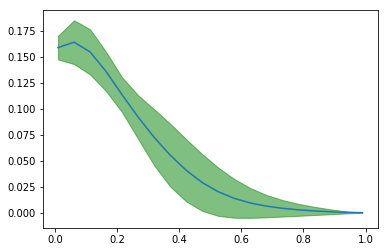

In [6]:
Q2=1
SBd_mean=load('SB_data/SBd_Q2_%d.dat'%Q2)[1]
SBd_std=load('SB_data/SBd_Q2_%d.dat'%Q2)[2]

plt.figure()
plt.plot(xarr,xarr*SBd_mean)
plt.fill_between(xarr,xarr*(SBd_mean+SBd_std),xarr*(SBd_mean-SBd_std),color='green',alpha=0.5)
plt.show()

In [7]:
xarr=np.linspace(0.01,0.99,20)
Q2arr=np.linspace(1.0,125,25)

SBu_mean_arr=np.array([load('SB_data/SBu_Q2_%d.dat'%Q2)[1] for Q2 in Q2arr]).flatten()
SBd_mean_arr=np.array([load('SB_data/SBd_Q2_%d.dat'%Q2)[1] for Q2 in Q2arr]).flatten()
SBu_std_arr=np.array([load('SB_data/SBu_Q2_%d.dat'%Q2)[2] for Q2 in Q2arr]).flatten()
SBd_std_arr=np.array([load('SB_data/SBd_Q2_%d.dat'%Q2)[2] for Q2 in Q2arr]).flatten()

SBQ2_arr=[Q2 for Q2 in Q2arr for x in xarr]
SBx_arr=[x for Q2 in Q2arr for x in xarr]

In [8]:
SBu_arr=[]
for i in range(len(SBx_arr)): SBu_arr.append([SBx_arr[i],SBQ2_arr[i],SBu_mean_arr[i],SBu_std_arr[i],0.0,'SBu'])
dfSBu = pd.DataFrame(SBu_arr,columns=['x','Q2','value','stat_err_u','sys_err_u','obs'])
writer = pd.ExcelWriter('expdata/1000.xlsx', engine='xlsxwriter')
dfSBu.to_excel(writer,index=False)
writer.save()

In [9]:
SBd_arr=[]
for i in range(len(SBx_arr)): SBd_arr.append([SBx_arr[i],SBQ2_arr[i],SBd_mean_arr[i],SBd_std_arr[i],0.0,'SBd'])
dfSBd = pd.DataFrame(SBd_arr,columns=['x','Q2','value','stat_err_u','sys_err_u','obs'])
writer = pd.ExcelWriter('expdata/2000.xlsx', engine='xlsxwriter')
dfSBd.to_excel(writer,index=False)
writer.save()